Для ДЗ взял открытые данные по FIFA19. Очень мало времени, поэтому данные вглубь не копаю, а просто показываю чему научился по построению графиков в Питоне.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv('data_fif19.csv')
ratings.head(50)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


Оставляем в датафрейме только игроков с рейтингом выше 70 из Испании, Бразилии и Италии. Count считает количество игроков с рейтингом выше 70 для каждой национальности.  Строим линейный график, т.к. для изучения показателей нам больше линии ничего не нужно.
Выводы:	
1.	Логично – количество игроков каждой национальности с увеличением рейтинга снижается.
2.	Для игроков с рейтингом до 76 доминируют бразильцы.
3.	На интервале с рейтингом от 76 до 87 доминируют испанцы.
4.	На интервале с рейтингом от 88 до 89 доминируют итальянцы.
5.	С рейтингом выше 89 итальянских игроков нет, а испанских заметно больше, чем бразильских.
Практический вывод – если игрок выбирает между тем по какой из 3-х национальностей строить команду в ультимет тейм – ответ очевиден – Испания.

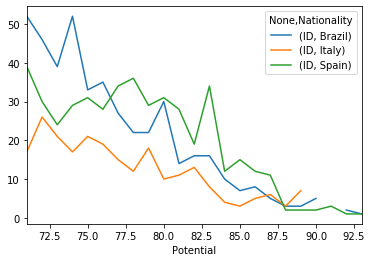

In [91]:
nn = ratings[((ratings.Nationality == 'Spain') | (ratings.Nationality == 'Brazil') | (ratings.Nationality == 'Italy')) & (ratings.Overall > 70)]
nn = nn[['ID','Nationality','Potential']]
nn = nn.groupby([nn.Potential, 'Nationality']).count()
nn.unstack('Nationality').plot()

Существует мнение, что Барселона более испанский клуб, чем Реал, поскольку Реал покупает много легионеров.  На примере данных из предыдущего датафрейма, рассмотрим количество испанцев, бразильцев и итальянцев в Барселоне и Реале. Используем для построения гистограмму, поскольку она позволит наглядно рассмотреть данные в столбцах.
Вывод:	
1.	Количество испанцев в обоих клубах +/- идентично.
2.	В обоих клубах не играют итальянцы.

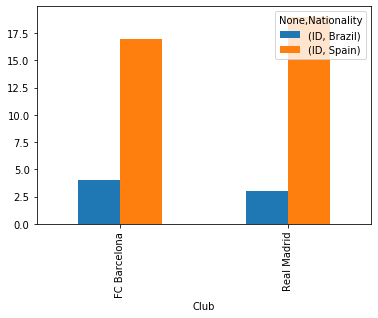

In [93]:
nn = ratings[((ratings.Nationality == 'Spain') | (ratings.Nationality == 'Brazil') | (ratings.Nationality == 'Italy')) & ((ratings.Club == 'FC Barcelona') | (ratings.Club == 'Real Madrid'))]
nn = nn[['ID','Nationality','Club']]
nn = nn.groupby([nn.Club, 'Nationality']).count()
nn.unstack('Nationality').plot(kind='bar')

Изучим количество игроков с рейтингом выше 90 в командах Реал и Ювентус. Отфильтровав данные, построим круговую диаграмму, поскольку для данного случая она подходит хорошо.
Вывод – количество игроков с рейтингов выше 90 в Реале выше чем в Ювентусе примерно на 75%.

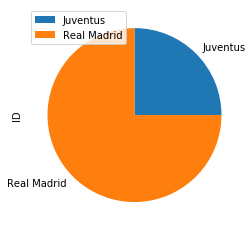

In [94]:
nn = ratings[(ratings.Overall >= 90) & ((ratings.Club == 'Juventus') | (ratings.Club == 'Real Madrid'))]
nn = nn[['ID','Overall','Club']]
nn = nn.groupby([nn.Club]).count()
nn.plot(kind='pie', y='ID')

Изучим зависимость таких показателей как возраст, текущий рейтинг и потенциальный рейтинг. Для этого строится стат.модель.
Вывод:
1.	Гистограмма «возраст» смещена влево, поэтому можно говорить, что в игре гораздо больше игроков с возрастом ниже среднего. Это же относится и к текущему рейтингу. Потенциальный рейтинг близок к центру.
2.	Существует зависимость между текущим и потенциальным рейтингом.
3.	С возрастом игрока растет его текущий рейтинг и падает потенциальный рейтинг.

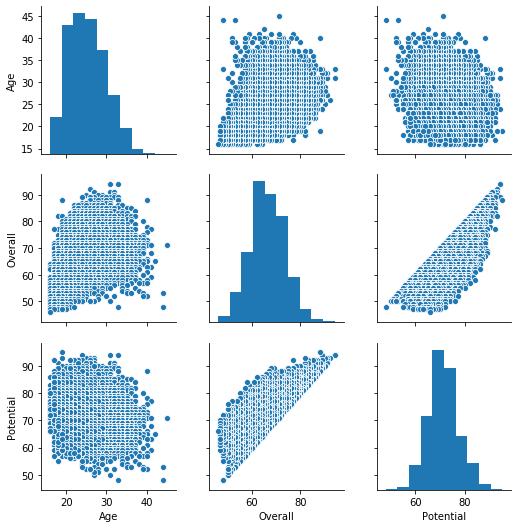

In [83]:
import seaborn as sns
sns_plot = sns.pairplot(
    ratings[['Age', 'Overall', 'Potential']])
sns_plot

Изучение игроков с различным возрастом в игре.  Используем гистограмму, поскольку у нас только 1 значение для рассмотрения – возраст.
Вывод:
1.	В игре больше всего футболистов в возрасте от 20 до 27 лет. До 20 лет прослеживает тренд вверх, а после 27 – тренд вниз. 
2.	Гистограмма левой части значительно выше гистограммы правой части. Следовательно молодых игроков больше чем возрастных. 

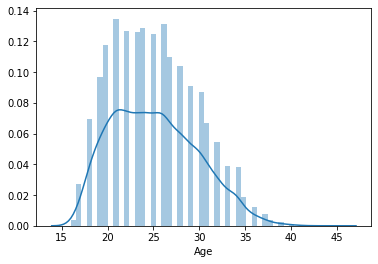

In [90]:
sns.distplot(ratings.Age)